#최근접이웃-이진분류
- diabetes dataset
- 당료병 예측 이진분류

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.데이터 준비

In [36]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

--2023-11-23 05:07:53--  https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.006s  

2023-11-23 05:07:53 (3.51 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



In [37]:
#데이터 로딩
diabetes = pd.read_csv('diabetes.csv')
print(type(diabetes))
diabetes.shape

<class 'pandas.core.frame.DataFrame'>


(768, 9)

In [38]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##2.데이터 탐색

In [39]:
df= diabetes.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

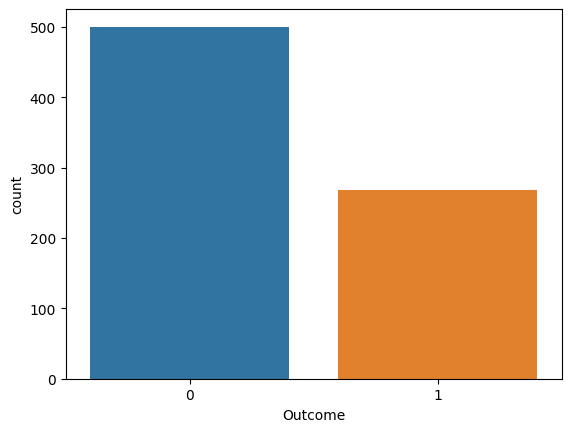

In [42]:
sns.countplot(data=df,x='Outcome')

- 결측치 수 확인

In [43]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##3.테스트 데이터

In [44]:
# X:입력,Y:출력
# 1.필요없는 피쳐를 드랍 시키는 방법 2.필요한 피처를 읽어오는 방법
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
Y=df['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
#테스트 데이터를 20% 분리
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [47]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [48]:
type(Y_train)

pandas.core.series.Series

In [49]:
type(X_train)

pandas.core.frame.DataFrame

In [50]:
Y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

##4.데이터 전처리

### 스케일링
- 스케일링과 레이블 인코딩 등의 전처리는 테스트 데이터를 포함하면 안된다

In [51]:
from sklearn.preprocessing import StandardScaler
# 1.객체 만들기
# 2. 피팅 fit이라는 함수 씀
# 3. 데이터 변환 transform 이라는 함수 씀

ss =StandardScaler()
ss.fit(X_train)                            # 트레인이랑 테스트 엑스 분리하고 스케일링을 해야함 (트레인만 스케일링 되도록) --- 레이블인코딩도 마찬가지
X_train_s=ss.transform(X_train)               # X_train_s 는 넘파이 어레이 형태임

In [52]:
X_train_s[:5]         # 넘파이 어레이라 head() 불가

array([[ 0.90832902,  0.91569367,  0.44912368,  0.52222619,  0.3736349 ,
         0.37852648,  0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103,  0.14814855, -0.69965674,
        -0.50667229, -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683,  0.77161128,  5.09271083,
         2.54094063, -0.11855487, -0.88240283],
       [-0.8354355 , -0.37427121, -0.67706208,  0.02345601,  0.45029859,
        -0.88604319,  1.10091422, -0.88240283],
       [ 1.19895644, -0.02818307, -3.54371676, -1.28581572, -0.69965674,
        -0.27904975, -0.85143778,  0.36693308]])

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train=le.fit_transform(Y_train)
Y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
type(X_train_s), type(Y_train)        # 전처리가 끝나면 다 넘파이 어레이 형태인지 확인 해봄. 다 넘파이 어레이로 넣기 위해(강사님 스타일)

(numpy.ndarray, numpy.ndarray)

##5.학습

- 베어스라인 학습

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# 1.객체 만들기
# 2. 학습 fit()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s,Y_train)

KNeighborsClassifier()

##6.평가

- 가장 간단한 방법

In [56]:
#테스트 데이터 전처리 ( 트레인 할때 사용했던 평균과 표준편차 그대로 사용)
X_test_s=ss.transform(X_test)
Y_test= le.transform(Y_test)

In [57]:
clf.score(X_test_s,Y_test)

0.7987012987012987

- 메트릭스 함수 사용해서 평가

In [58]:
from sklearn.metrics import accuracy_score,recall_score, precision_score             # metrics 안에 평가하는 함수들이 많이 있음

Y_pred =clf.predict(X_test_s)   # 예측값

#평가
acc= accuracy_score(Y_test,Y_pred)
re= recall_score(Y_test,Y_pred)
pr= precision_score(Y_test,Y_pred)
print('정확도:',acc)
print('재현율:',re)
print('정밀도:',pr)                             # 베이스라인의 평가(뭔가 튜닝하기전 평가)

정확도: 0.7987012987012987
재현율: 0.6382978723404256
정밀도: 0.6818181818181818


- 혼동(오차) 행렬

In [59]:
from sklearn.metrics import confusion_matrix

cfm= confusion_matrix(Y_test, Y_pred)
cfm

array([[93, 14],
       [17, 30]])

[Text(0.5, 23.52222222222222, 'Prediction'),
 Text(50.722222222222214, 0.5, 'Actual')]

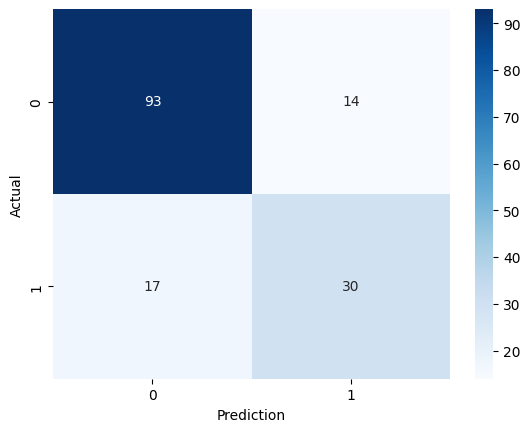

In [60]:
s=sns.heatmap(cfm, annot=True,cmap="Blues",fmt='d')          # fmt='d'는 십진수로 해달라는 말
s.set(xlabel= 'Prediction',ylabel="Actual")

##7.튜닝

In [61]:
values=[]

for k in range(1,30):
  clf= KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_s, Y_train)
  acc=clf.score(X_test_s,Y_test)
  values.append(acc)

In [62]:
values

[0.7337662337662337,
 0.7662337662337663,
 0.7402597402597403,
 0.7922077922077922,
 0.7987012987012987,
 0.8051948051948052,
 0.7727272727272727,
 0.7792207792207793,
 0.7727272727272727,
 0.7792207792207793,
 0.7727272727272727,
 0.7792207792207793,
 0.7792207792207793,
 0.7922077922077922,
 0.8051948051948052,
 0.8116883116883117,
 0.8116883116883117,
 0.8116883116883117,
 0.8051948051948052,
 0.7922077922077922,
 0.7987012987012987,
 0.7987012987012987,
 0.7922077922077922,
 0.7922077922077922,
 0.7922077922077922,
 0.7857142857142857,
 0.7922077922077922,
 0.7857142857142857,
 0.8051948051948052]

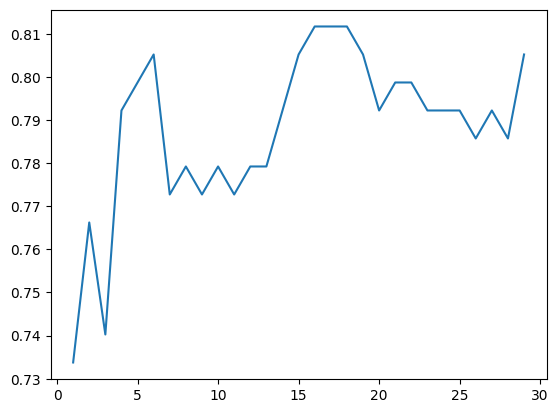

In [63]:
plt.plot(np.arange(1,30),values)
plt.show()

##8.최종모델

In [64]:
clf= KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [65]:
#최종테스트
acc=clf.score(X_test_s,Y_test)
acc

0.8116883116883117